In [28]:
# Inizializza una lista vuota per memorizzare tutti i dati
all_data = []

# Apri il file in modalità lettura
with open('data.txt', 'r') as file:
    # Leggi tutte le righe del file
    lines = file.readlines()

    # Itera attraverso le righe
    for line in lines:
        # Rimuovi il carattere di nuova riga
        line = line.strip()

        # Dividi la riga in una lista di valori
        data = line.split(',')
        # Aggiungi la lista di valori alla lista di tutti i dati
        for i in range(len(data)):
            all_data.append(data[i])

#stampa i primi 10 elementi della lista
print(all_data[:10])
print(len(all_data))

#chek if the data is a string o a number
for i in range(len(all_data)):
    try:
        all_data[i] = float(all_data[i])
    except ValueError:
        print("error in line", i)
        print("invalid data:", all_data[i])
        # delete all_data[i] from the list

#delete the data with '' form all_data
all_data = [x for x in all_data if x != '']
        

['0.11101766675710678', ' 0.11071331053972244', ' 0.11040928959846497', ' 0.11010567843914032', ' 0.10980261117219925', ' 0.10950015485286713', ' 0.10922352224588394', ' 0.10892253369092941', ' 0.10864885151386261', '']
739
error in line 9
invalid data: 
error in line 19
invalid data: 
error in line 29
invalid data: 
error in line 39
invalid data: 
error in line 49
invalid data: 
error in line 59
invalid data: 
error in line 69
invalid data: 
error in line 79
invalid data: 
error in line 89
invalid data: 
error in line 99
invalid data: 
error in line 109
invalid data: 
error in line 119
invalid data: 
error in line 129
invalid data: 
error in line 139
invalid data: 
error in line 149
invalid data: 
error in line 159
invalid data: 
error in line 169
invalid data: 
error in line 179
invalid data: 
error in line 189
invalid data: 
error in line 199
invalid data: 
error in line 209
invalid data: 
error in line 219
invalid data: 
error in line 229
invalid data: 
error in line 240
invalid da

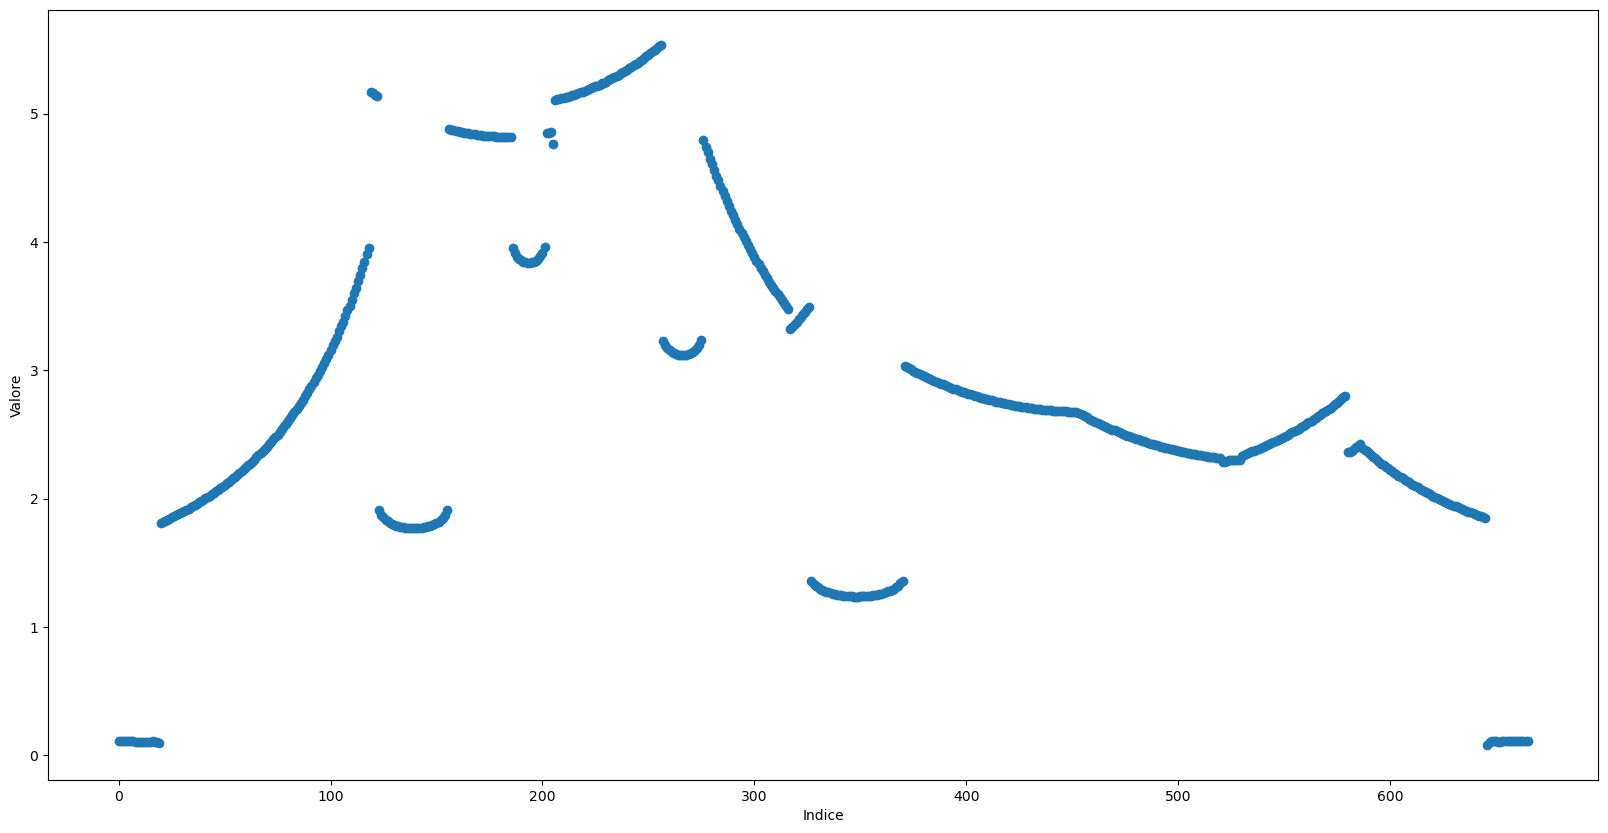

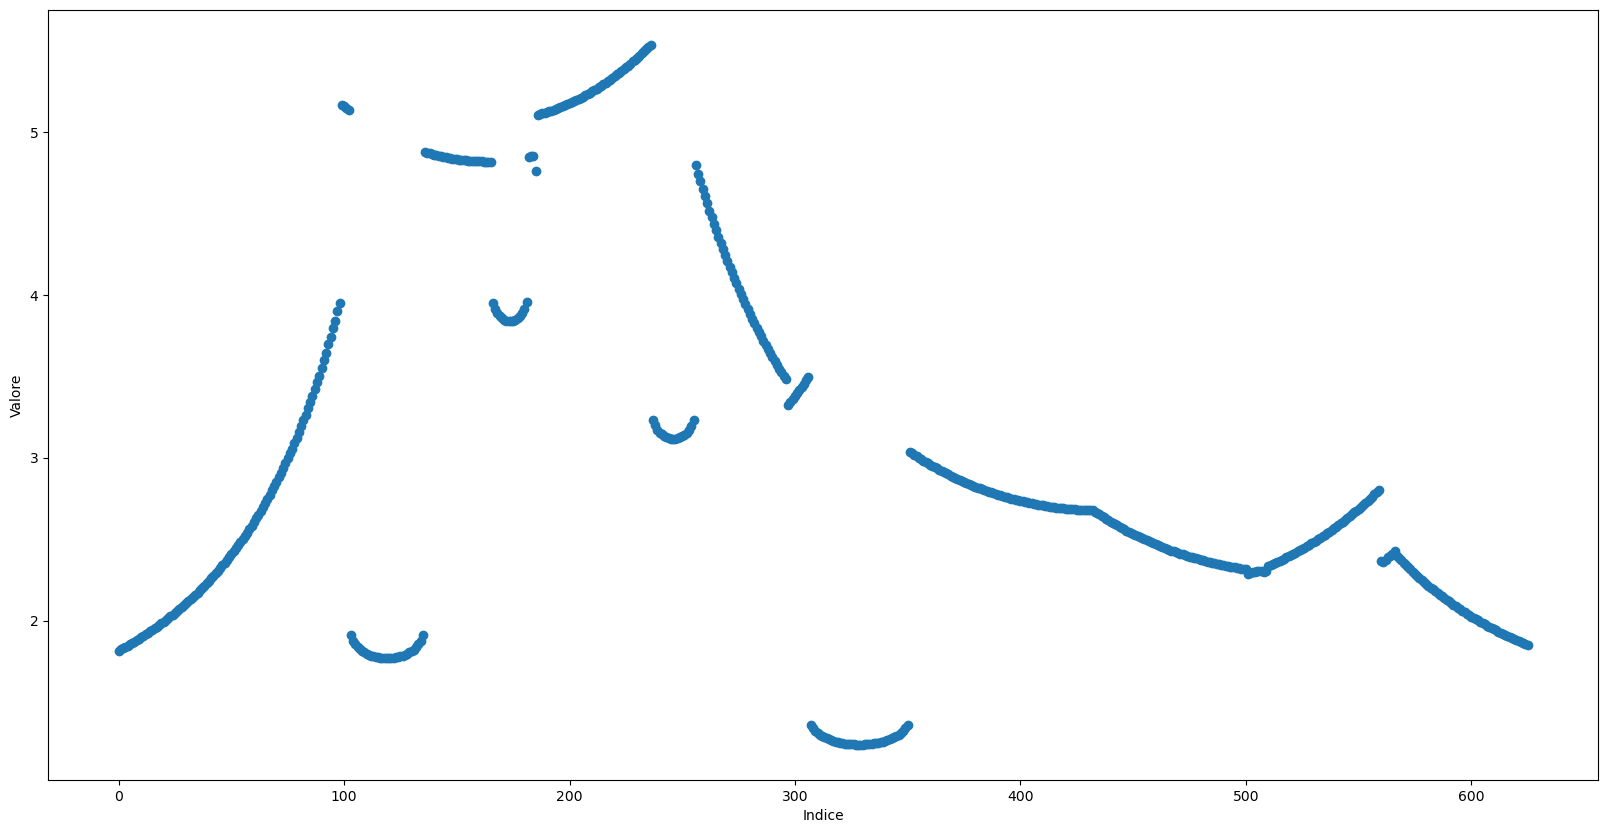

In [29]:
import matplotlib.pyplot as plt

def plot_data(dataPlot):
    #set the size of the plot
    plt.figure(figsize=(20,10))

    # Crea una lista di indici
    indices = list(range(len(dataPlot)))

    # Rappresenta i dati nello spazio euclideo
    plt.scatter(indices, dataPlot, marker='o')

    # Etichette degli assi
    plt.xlabel('Indice')
    plt.ylabel('Valore')

    # Mostra il grafico
    plt.show()
# La tua lista di dati
data = all_data
plot_data(data)

#pulizia dati
#rimuovi primi 20 elementi e gli ultimi 20
dataCleand = data[20:-20]
plot_data(dataCleand)



In [30]:
#smooth data

def smooth_data(dataS, window_size):
    # Crea una lista vuota per memorizzare i dati
    smoothed_data = []

    # Itera attraverso i dati
    for i in range(len(dataS)):
        # Se il dato è troppo vicino al bordo, non è possibile calcolare la media
        if i < window_size or i >= len(dataS) - window_size:
            smoothed_data.append(dataS[i])
        else:
            # Calcola la media dei dati nel range
            total = 0
            for j in range(i - window_size, i + window_size + 1):
                total += dataS[j]
            smoothed_data.append(total / (window_size * 2 + 1))

    return smoothed_data

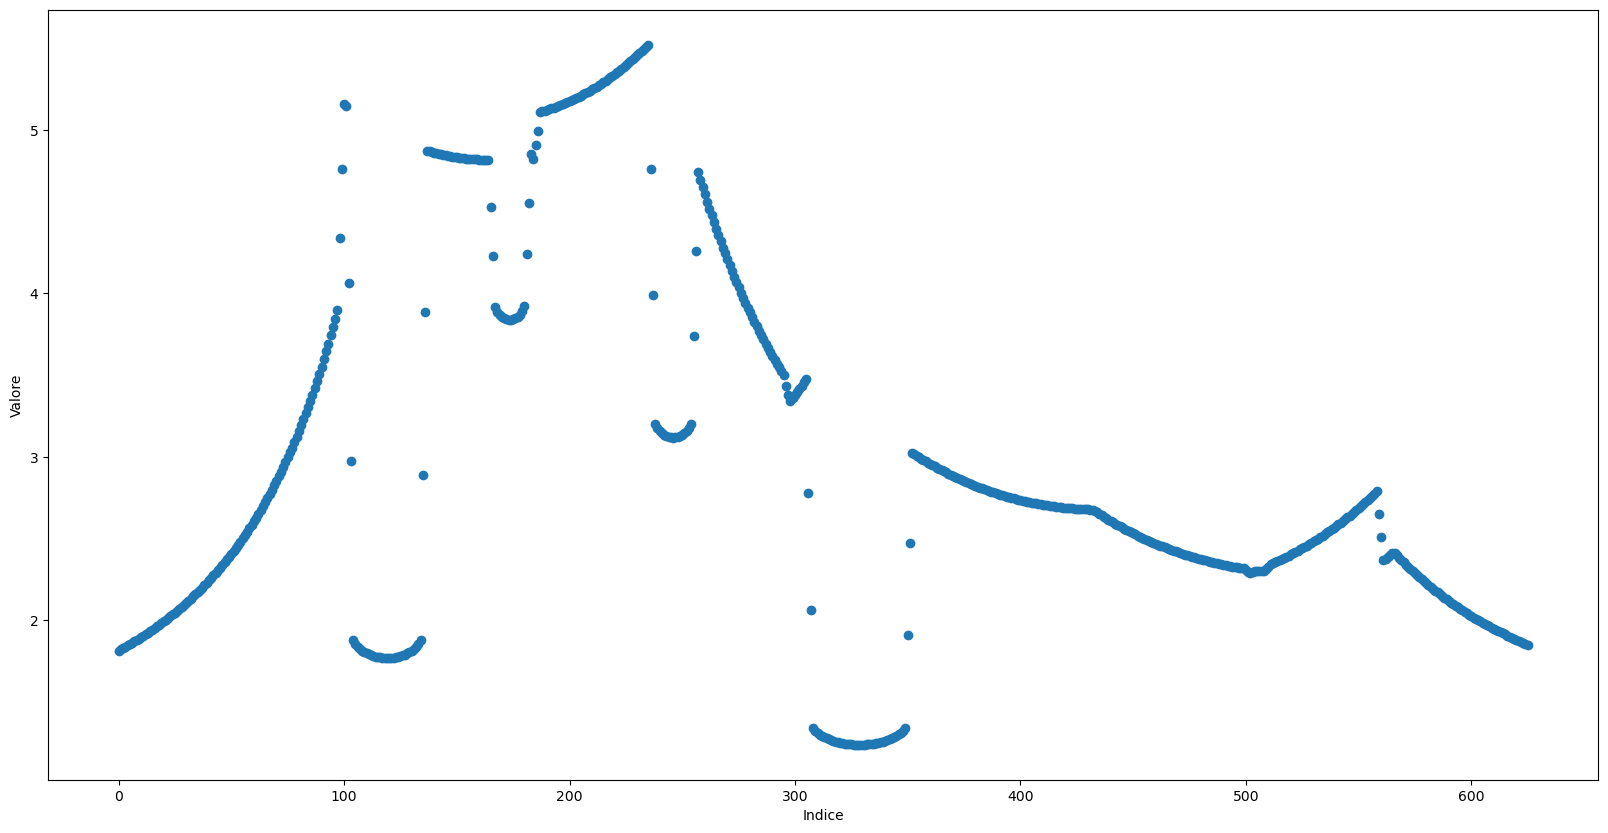

In [31]:
smooth_data = smooth_data(dataCleand, 1)
plot_data(smooth_data)

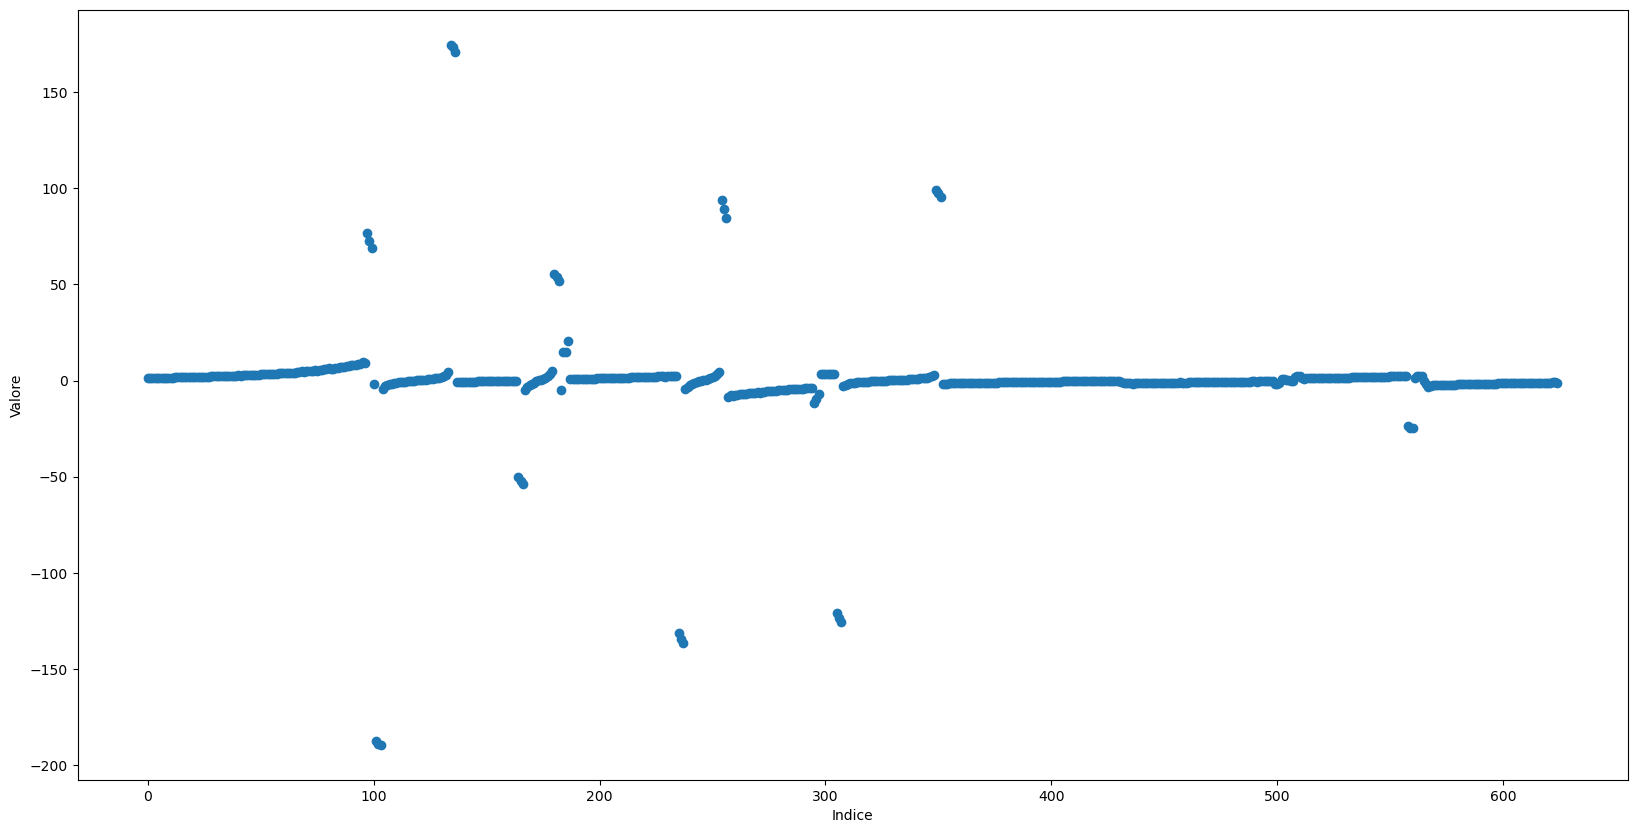

In [35]:
def diff_fin(fxh,fx,h):
    return (fxh-fx)/h

#costatnt 
h = 0.005774

derPrima = []
derSeconda = []

for i in range(len(smooth_data)-1):
    derPrima.append(diff_fin(smooth_data[i+1],smooth_data[i],h))

plot_data(derPrima)
        

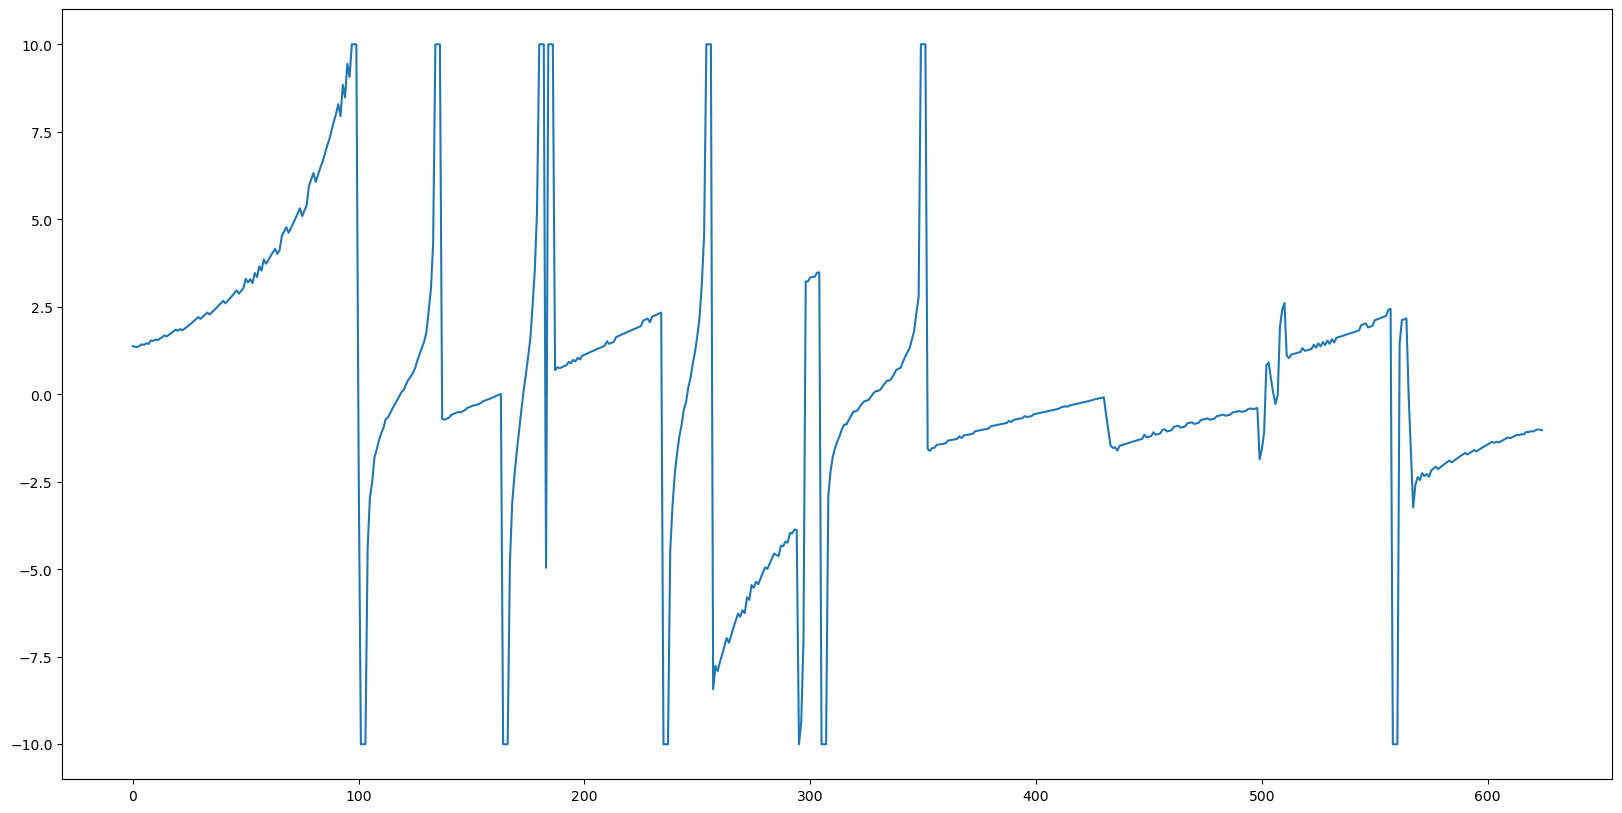

In [36]:
#abbassa i valri maggiori di 10 a 10 e quelli minori di -10 a -10 in modo da avere una linea più pulita
derPrimaCleaned = derPrima
for i in range(len(derPrimaCleaned)):
    if derPrimaCleaned[i] > 10:
        derPrimaCleaned[i] = 10
    elif derPrimaCleaned[i] < -10:
        derPrimaCleaned[i] = -10
plt.figure(figsize=(20,10))
plt.plot(derPrimaCleaned)
#set the size of the plot



In [34]:
smooth_data_der = smooth_data(derPrimaCleaned, 2)
plt.figure(figsize=(20,10))
plt.plot(smooth_data_der)
plt.show()
#calcolo della seconda derivata
for i in range(len(smooth_data_der)-1):
    derSeconda.append(diff_fin(smooth_data_der[i+1],smooth_data_der[i],h))



TypeError: 'list' object is not callable

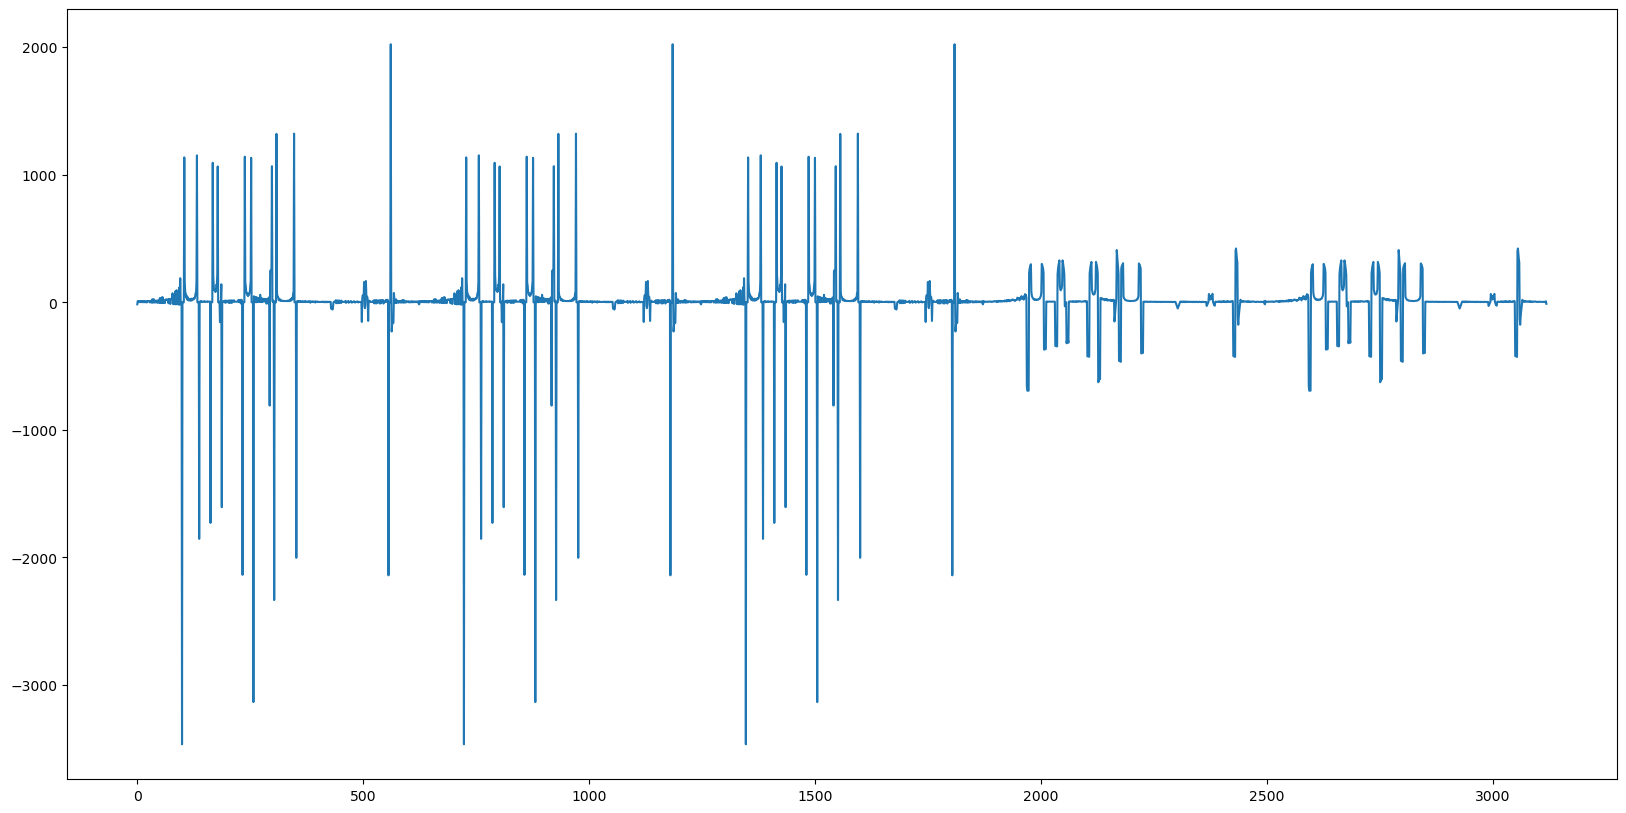

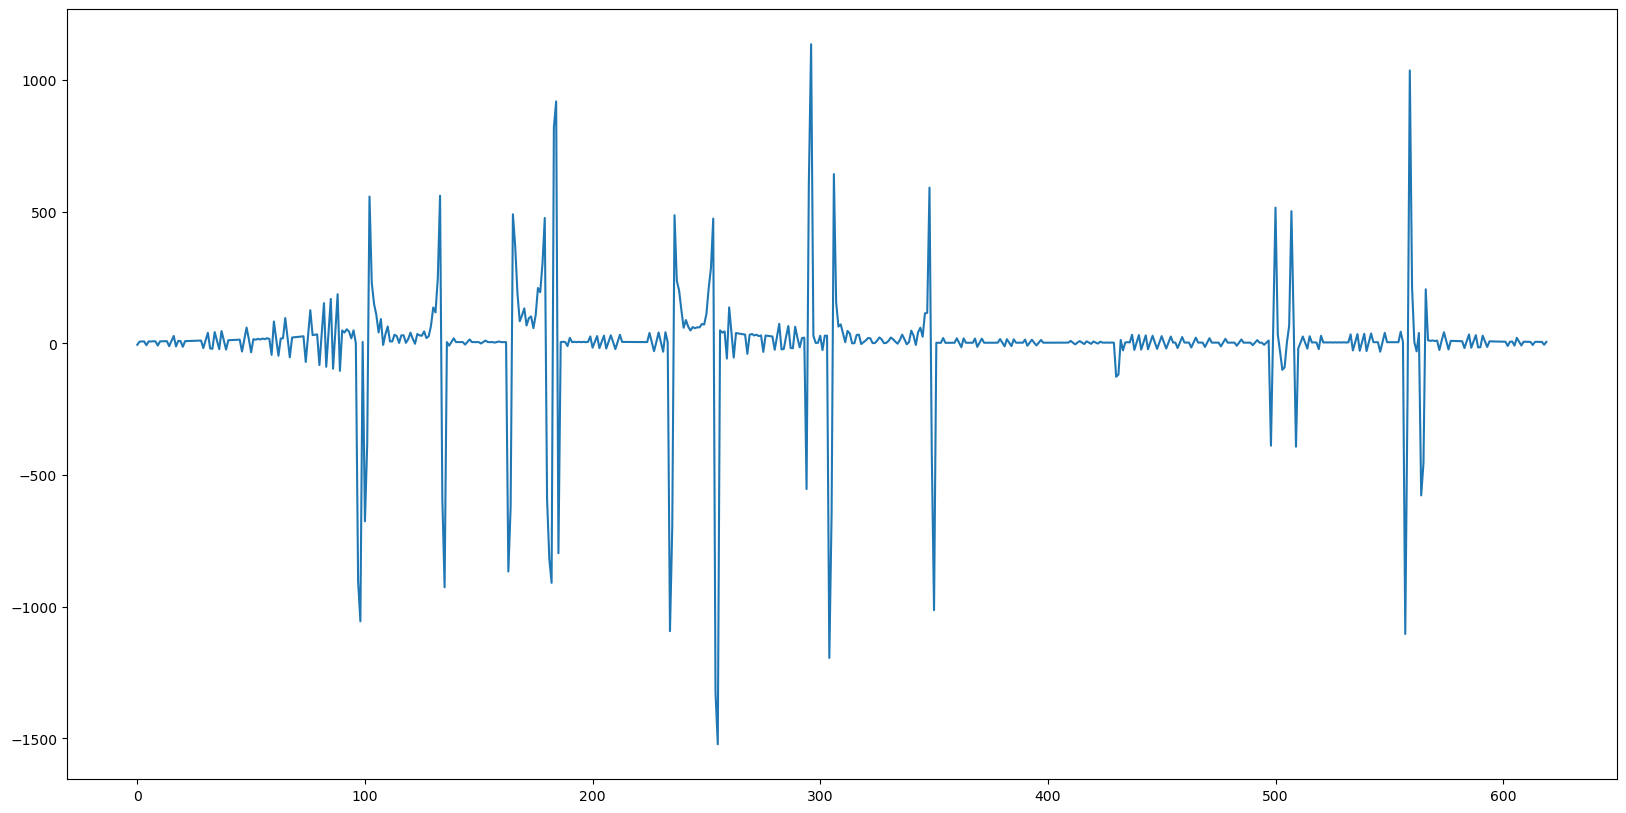

In [ ]:
#smooth the data
derSecondaSmooth = []
for i in range(len(derSeconda)-4):
    derSecondaSmooth.append((derSeconda[i]+derSeconda[i+1])/2)

plt.figure(figsize=(20,10))
plt.plot(derSecondaSmooth)

